In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [2]:
df= pd.read_csv("beer_ratings.txt",sep="\t",names=["alcohol_by_weight", "rating", "bitterness", "nitrogen", "turbidity", "sugars", "degree_of_fermentation", "calorific_value", "density", "pH", "colour", "sulphites"])


In [3]:
df.isna().sum()

alcohol_by_weight         0
rating                    0
bitterness                0
nitrogen                  0
turbidity                 0
sugars                    0
degree_of_fermentation    0
calorific_value           0
density                   0
pH                        0
colour                    0
sulphites                 0
dtype: int64

In [4]:
df.head()
# all features are numerical

,alcohol_by_weight,rating,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites
0,4.476190,60,10.4,0.500,1.6268,15.75,66.470,41,0.9678,3.72,11.825,44.3750
1,4.523810,61,10.3,0.530,1.6268,15.12,67.252,26,0.9676,3.73,13.760,36.2500
2,4.714286,61,11.5,0.740,0.7968,17.64,82.110,32,0.9698,3.74,14.405,16.5625
3,5.238095,60,8.4,0.465,1.6268,15.75,68.816,42,0.9666,3.86,16.770,33.1250
4,4.476190,60,11.0,0.730,0.7968,15.12,60.214,9,0.9674,3.59,12.255,10.3125


In [5]:
df_train=df.sample(frac=0.8,random_state=0)
df_test=df.drop(df_train.index)

In [6]:
df_test.shape

(187, 12)

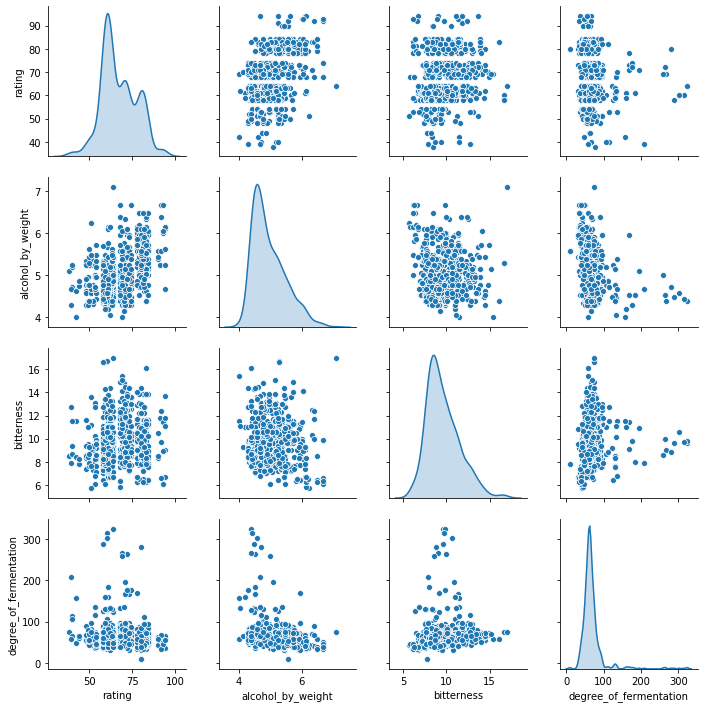

In [7]:
sns.pairplot(df_train[['rating', 'alcohol_by_weight', 'bitterness', 'degree_of_fermentation']], diag_kind='kde')

In [8]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol_by_weight,749.0,4.966463,0.523134,4.00000,4.52381,4.809524,5.238095,7.095238
rating,749.0,67.242991,10.174137,38.00000,60.00000,64.000000,74.000000,94.000000
bitterness,749.0,9.642323,1.890353,5.70000,8.30000,9.200000,10.800000,17.000000
nitrogen,749.0,0.623905,0.186729,0.22000,0.48000,0.620000,0.740000,1.680000
turbidity,749.0,0.940327,0.656209,0.00000,0.33200,0.896400,1.494000,2.490000
sugars,749.0,16.272757,8.575427,7.56000,11.97000,13.860000,17.010000,86.940000
degree_of_fermentation,749.0,68.208358,32.200311,9.38400,55.52200,62.560000,71.944000,324.530000
calorific_value,749.0,18.376502,10.320909,4.00000,10.00000,16.000000,24.000000,69.000000
density,749.0,0.966942,0.001965,0.96064,0.96572,0.966900,0.968100,0.973150
pH,749.0,3.802150,0.156333,3.36000,3.70000,3.800000,3.890000,4.400000


In [9]:
# Separate X and Y
x_train=df_train.copy()
x_test=df_test.copy()

#drops the column from original dataframes and returns the columns as series
y_train=x_train.pop('rating')
y_test=x_test.pop('rating')



In [10]:
df_train.describe().transpose()[['mean', 'std']]

,mean,std
alcohol_by_weight,4.966463,0.523134
rating,67.242991,10.174137
bitterness,9.642323,1.890353
nitrogen,0.623905,0.186729
turbidity,0.940327,0.656209
sugars,16.272757,8.575427
degree_of_fermentation,68.208358,32.200311
calorific_value,18.376502,10.320909
density,0.966942,0.001965
pH,3.802150,0.156333


In [11]:
normalizer=preprocessing.Normalization()

In [12]:
normalizer.adapt(np.array(x_train))

In [13]:
#holds the mean and variance
normalizer.mean.numpy()
normalizer.variance.numpy()

array([2.73303926e-01, 3.56866264e+00, 3.48210298e-02, 4.30035204e-01,
       7.34397736e+01, 1.03547571e+03, 1.06378937e+02, 3.85511657e-06,
       2.44075283e-02, 1.30692186e+01, 1.09594574e+02], dtype=float32)

In [14]:
#Linear Model
linear_model= tf.keras.Sequential([normalizer,layers.Dense(units=1)])

In [15]:
linear_model.compile(
optimizer=tf.optimizers.Adam(learning_rate=0.1),
loss='mean_absolute_error')

# linear_model.compile(
# optimizer=tf.optimizers.RMSprop(learning_rate=0.1),
# loss='mean_squared_error')

In [16]:
%%time
history=linear_model.fit(np.array(x_train),np.array(y_train),
                        epochs=100,validation_split=0.2)

Train on 599 samples, validate on 150 samples
Epoch 1/100
599/599 [==============================] - 0s 342us/sample - loss: 66.3574 - val_loss: 66.0350
Epoch 2/100
599/599 [==============================] - 0s 40us/sample - loss: 64.3381 - val_loss: 64.1861
Epoch 3/100
599/599 [==============================] - 0s 37us/sample - loss: 62.4058 - val_loss: 62.4588
Epoch 4/100
599/599 [==============================] - 0s 36us/sample - loss: 60.4803 - val_loss: 60.7059
Epoch 5/100
599/599 [==============================] - 0s 35us/sample - loss: 58.5136 - val_loss: 58.8512
Epoch 6/100
599/599 [==============================] - 0s 35us/sample - loss: 56.5884 - val_loss: 57.1310
Epoch 7/100
599/599 [==============================] - 0s 35us/sample - loss: 54.6652 - val_loss: 55.4064
Epoch 8/100
599/599 [==============================] - 0s 34us/sample - loss: 52.7142 - val_loss: 53.6459
Epoch 9/100
599/599 [==============================] - 0s 34us/sample - loss: 50.7814 - val_loss: 51.8729

599/599 [==============================] - 0s 34us/sample - loss: 6.1134 - val_loss: 5.8200
Epoch 79/100
599/599 [==============================] - 0s 35us/sample - loss: 6.0895 - val_loss: 5.8141
Epoch 80/100
599/599 [==============================] - 0s 34us/sample - loss: 6.1016 - val_loss: 5.8169
Epoch 81/100
599/599 [==============================] - 0s 34us/sample - loss: 6.0869 - val_loss: 5.7964
Epoch 82/100
599/599 [==============================] - 0s 35us/sample - loss: 6.1130 - val_loss: 5.7618
Epoch 83/100
599/599 [==============================] - 0s 35us/sample - loss: 6.0829 - val_loss: 5.7949
Epoch 84/100
599/599 [==============================] - 0s 33us/sample - loss: 6.0902 - val_loss: 5.8358
Epoch 85/100
599/599 [==============================] - 0s 34us/sample - loss: 6.1096 - val_loss: 5.7582
Epoch 86/100
599/599 [==============================] - 0s 36us/sample - loss: 6.1161 - val_loss: 5.8301
Epoch 87/100
599/599 [==============================] - 0s 33us/samp

In [17]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Rating]')
  plt.legend()
  plt.grid(True)

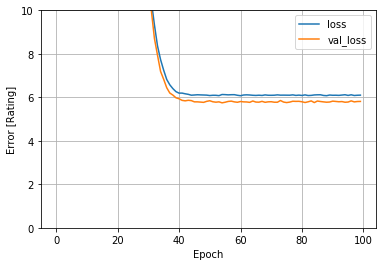

In [18]:
plot_loss(history)

In [19]:
test_results={}
test_results['linear_model']=linear_model.evaluate(np.array(x_test),np.array(y_test))

187/187 [==============================] - 0s 35us/sample - loss: 5.5415


In [20]:
y_predicted_lm=linear_model.predict(x_test).flatten()

In [21]:
#Neural Network

dnn_model=keras.Sequential([normalizer,
                           layers.Dense(64,activation='relu'),
                            layers.Dense(64,activation='relu'),
                           layers.Dense(1)])

In [22]:
dnn_model.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [23]:
%%time
history = dnn_model.fit(np.array(x_train),np.array(y_train),
             validation_split=0.2,
             epochs=100)

Train on 599 samples, validate on 150 samples
Epoch 1/100
599/599 [==============================] - 0s 433us/sample - loss: 65.9858 - val_loss: 65.5377
Epoch 2/100
599/599 [==============================] - 0s 52us/sample - loss: 63.7083 - val_loss: 62.4641
Epoch 3/100
599/599 [==============================] - 0s 42us/sample - loss: 59.4613 - val_loss: 56.7037
Epoch 4/100
599/599 [==============================] - 0s 42us/sample - loss: 51.9661 - val_loss: 47.1483
Epoch 5/100
599/599 [==============================] - 0s 41us/sample - loss: 40.3907 - val_loss: 33.5309
Epoch 6/100
599/599 [==============================] - 0s 42us/sample - loss: 25.9404 - val_loss: 20.7080
Epoch 7/100
599/599 [==============================] - 0s 41us/sample - loss: 17.5539 - val_loss: 16.7469
Epoch 8/100
599/599 [==============================] - 0s 42us/sample - loss: 14.9934 - val_loss: 15.1646
Epoch 9/100
599/599 [==============================] - 0s 38us/sample - loss: 13.8101 - val_loss: 14.2796

599/599 [==============================] - 0s 40us/sample - loss: 5.5782 - val_loss: 5.9833
Epoch 79/100
599/599 [==============================] - 0s 39us/sample - loss: 5.5483 - val_loss: 5.9585
Epoch 80/100
599/599 [==============================] - 0s 38us/sample - loss: 5.5373 - val_loss: 6.1039
Epoch 81/100
599/599 [==============================] - 0s 39us/sample - loss: 5.5891 - val_loss: 5.9325
Epoch 82/100
599/599 [==============================] - 0s 45us/sample - loss: 5.5744 - val_loss: 6.0159
Epoch 83/100
599/599 [==============================] - 0s 44us/sample - loss: 5.5329 - val_loss: 5.9186
Epoch 84/100
599/599 [==============================] - 0s 44us/sample - loss: 5.4626 - val_loss: 5.8996
Epoch 85/100
599/599 [==============================] - 0s 46us/sample - loss: 5.4536 - val_loss: 5.9447
Epoch 86/100
599/599 [==============================] - 0s 43us/sample - loss: 5.4512 - val_loss: 5.8989
Epoch 87/100
599/599 [==============================] - 0s 46us/samp

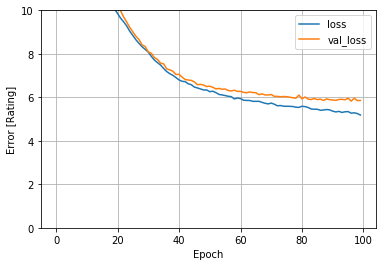

In [24]:
plot_loss(history)

In [25]:
test_results['DNN_Model']=dnn_model.evaluate(np.array(x_test),np.array(y_test))

187/187 [==============================] - 0s 38us/sample - loss: 5.2177


In [26]:
y_pred_dnn=dnn_model.predict(x_test).flatten()

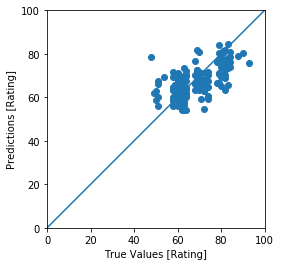

In [27]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_predicted_lm)
plt.xlabel('True Values [Rating]')
plt.ylabel('Predictions [Rating]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

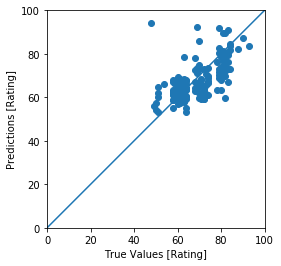

In [28]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_dnn)
plt.xlabel('True Values [Rating]')
plt.ylabel('Predictions [Rating]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)